## Task 1: Independent-test classification using bagging classifier

In [1]:
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = datasets.load_digits()
print(dataset.data.shape)

(1797, 64)


In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset.data, dataset.target, test_size=.3, random_state=42)

In [4]:
bc = BaggingClassifier( 
                       n_estimators=15,
                        max_samples=0.75,
                        max_features=0.75,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=0
                      )

In [5]:
bc.fit(Xtrain, ytrain)

BaggingClassifier(bootstrap_features=True, max_features=0.75, max_samples=0.75,
                  n_estimators=15, n_jobs=-1, oob_score=True, random_state=0)

In [6]:
bc.score(Xtest, ytest)

0.9703703703703703

In [7]:
y_pred = bc.predict(Xtest)

In [8]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.98      0.96        50
           2       1.00      0.96      0.98        47
           3       0.96      0.94      0.95        54
           4       0.94      1.00      0.97        60
           5       0.98      0.97      0.98        66
           6       0.98      0.98      0.98        53
           7       0.96      0.96      0.96        55
           8       0.95      0.95      0.95        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [9]:
bc.oob_score_

0.9276054097056484

# 5NN Bagging Classifier Base

In [10]:
from sklearn.neighbors import KNeighborsClassifier

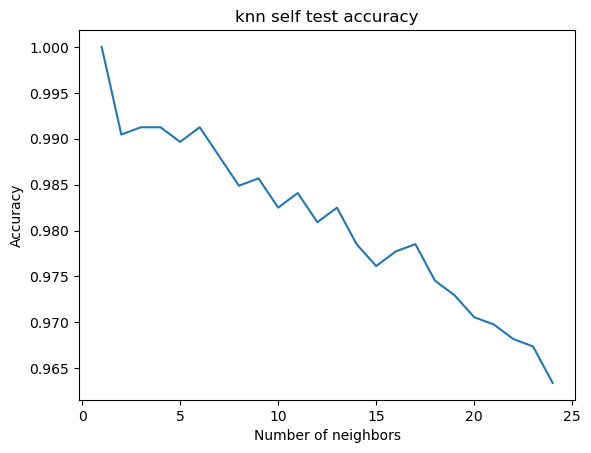

In [11]:
neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))

for i, k, in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    accuracy[i] = knn.score(Xtrain, ytrain)
    
plt.title('knn self test accuracy')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [68]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(Xtrain, ytrain)
print(knn.score(Xtest, ytest))

0.9944444444444445


In [13]:
bc = BaggingClassifier(knn, 
                       n_estimators=10,
                        max_samples=0.75,
                        max_features=0.75,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=0
                      )

In [14]:
bc.fit(Xtrain, ytrain)
print(bc.score(Xtest, ytest))
y_pred = bc.predict(Xtest)

C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9833333333333333


In [15]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.97      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.96      1.00      0.98        55
           8       0.98      0.95      0.96        43
           9       0.98      0.92      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



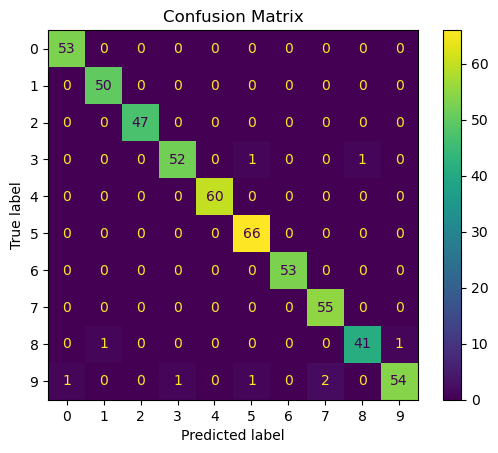

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

# DT Bagging Classifier Base

In [17]:
from sklearn.tree import DecisionTreeClassifier

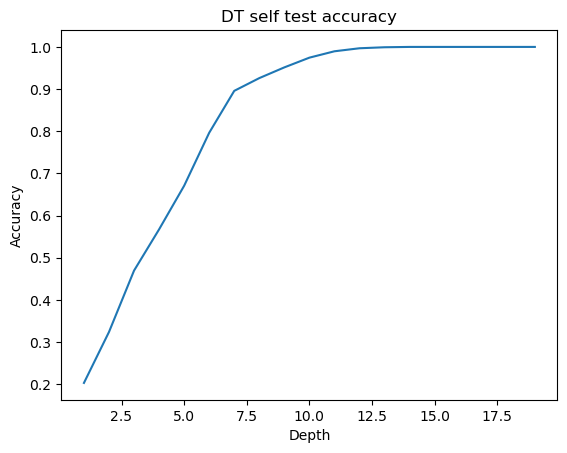

In [18]:
depth = np.arange(1, 20)
accuracy = np.empty(len(depth))

for i, k, in enumerate(depth):
    dt = DecisionTreeClassifier(max_depth = k, random_state = 0)
    dt.fit(Xtrain, ytrain)
    accuracy[i] = dt.score(Xtrain, ytrain)
    
plt.title('DT self test accuracy')
plt.plot(depth, accuracy)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [19]:
dt = DecisionTreeClassifier(
    max_depth = 11, 
    random_state = 0, 
    splitter="random",
    min_samples_split=.0005,
)
dt.fit(Xtrain, ytrain)
print("Decision Tree Classification")
print("accuracy of training data:", dt.score(Xtrain, ytrain))
print("accuracy of testing data:", dt.score(Xtest, ytest))

Decision Tree Classification
accuracy of training data: 0.9928400954653938
accuracy of testing data: 0.8407407407407408


In [20]:
bc = BaggingClassifier(dt, 
                       n_estimators=10,
                        max_samples=0.75,
                        max_features=0.75,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=0
                      )

In [21]:
bc.fit(Xtrain, ytrain)

C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(max_depth=11,
                                                   min_samples_split=0.0005,
                                                   random_state=0,
                                                   splitter='random'),
                  max_features=0.75, max_samples=0.75, n_jobs=-1,
                  oob_score=True, random_state=0)

In [22]:
print(bc.score(Xtest, ytest))
y_pred = bc.predict(Xtest)

0.95


In [23]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.92      0.98      0.95        50
           2       0.98      0.96      0.97        47
           3       0.93      0.94      0.94        54
           4       0.95      0.98      0.97        60
           5       0.93      0.97      0.95        66
           6       0.98      0.96      0.97        53
           7       0.95      0.98      0.96        55
           8       0.91      0.91      0.91        43
           9       1.00      0.83      0.91        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



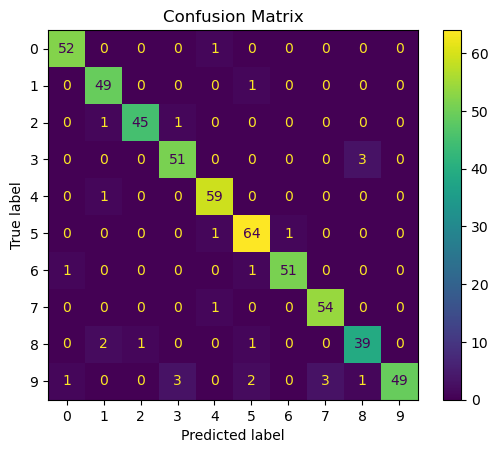

In [24]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

# SVM Bagging Classifier Base

In [25]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [72]:
pca = RandomizedPCA(n_components=32, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
svc.fit(Xtrain, ytrain)

SVC(class_weight='balanced')

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid= {'svc__C':[1,5,10,50],
                'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 27 s
Wall time: 7.14 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [74]:
svc = SVC(C=10, kernel='rbf', gamma=.005, class_weight='balanced')

In [75]:
svc.fit(Xtrain, ytrain)

SVC(C=10, class_weight='balanced', gamma=0.005)

In [76]:
svc.score(Xtest, ytest)

0.9574074074074074

In [31]:
bc = BaggingClassifier(svc, 
                       n_estimators=10,
                        max_samples=0.75,
                        max_features=0.75,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=0
                      )

In [32]:
bc.fit(Xtrain, ytrain)
bc.score(Xtest, ytest)

C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9777777777777777

In [33]:
y_pred = bc.predict(Xtest)

In [34]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      0.98      0.99        53
           7       0.96      0.98      0.97        55
           8       0.91      0.95      0.93        43
           9       0.96      0.93      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



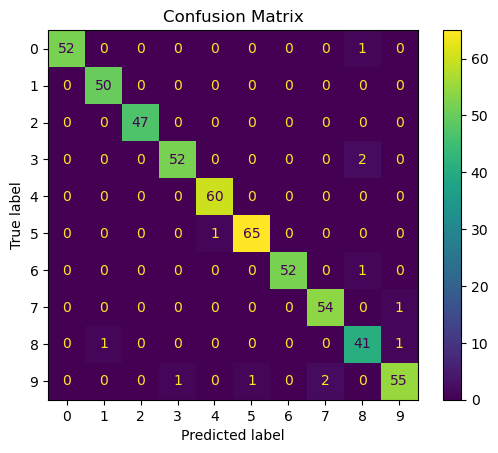

In [35]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

# Task 2: Independent-test classification using RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = dataset.data
y = dataset.target
train_X, test_X, train_Y, test_Y = train_test_split(X,y)

In [38]:
print(dataset.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


for max feautres, we will use the number of features (64) to the power of 2

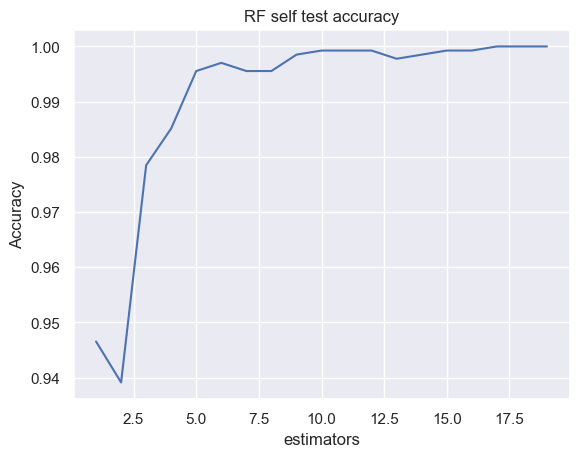

In [77]:
depth = np.arange(1, 20)
accuracy = np.empty(len(depth))

for i, k, in enumerate(depth):
    rf = RandomForestClassifier(
    n_estimators=k,
    max_features=4096 # (features^2)
)
    rf.fit(train_X, train_Y)
    accuracy[i] = rf.score(train_X, train_Y)
    
plt.title('RF self test accuracy')
plt.plot(depth, accuracy)
plt.xlabel('estimators')
plt.ylabel('Accuracy')
plt.show()

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset.data, dataset.target, test_size=.3, random_state=42)

In [41]:
rf = RandomForestClassifier(
    n_estimators=8,
    max_features=4096 # (features^2)
)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_features=4096, n_estimators=8)

In [42]:
rf.score(Xtest, ytest)

0.9203703703703704

In [43]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_features=4096 # (features^2)
)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_features=4096)

In [44]:
rf.score(Xtest, ytest)

0.9481481481481482

In [45]:
y_pred = rf.predict(Xtest)

In [46]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.91      0.98      0.94        50
           2       0.98      0.94      0.96        47
           3       0.96      0.89      0.92        54
           4       0.92      0.98      0.95        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.96      0.95      0.95        55
           8       0.87      0.91      0.89        43
           9       0.93      0.92      0.92        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



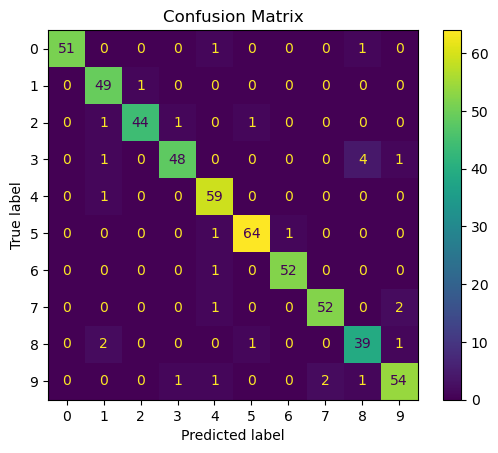

In [47]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

# Task 3: Indepent-test classification using AdaBoost classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
X = dataset.data
y = dataset.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

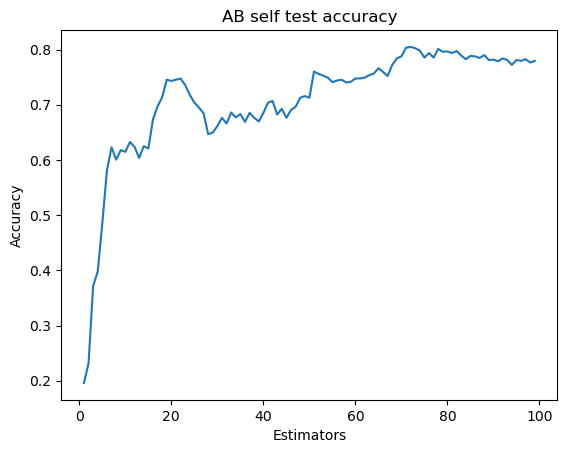

In [49]:
depth = np.arange(1, 100)
accuracy = np.empty(len(depth))

# any higher range will take forever to process (for my computer at least)

for i, k, in enumerate(depth):
    ab = AdaBoostClassifier(estimator=None, # default is DT
                        n_estimators=k, 
                        learning_rate=.5, 
                        random_state=None)
    ab.fit(Xtrain, ytrain)
    accuracy[i] = ab.score(Xtrain, ytrain)
    
plt.title('AB self test accuracy')
plt.plot(depth, accuracy)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()

In [50]:
ab = AdaBoostClassifier(estimator=None, # default is DT
                        n_estimators=700, 
                        learning_rate=.5, 
                        random_state=None)

In [51]:
ab.fit(Xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.5, n_estimators=700)

In [52]:
ab.score(Xtest, ytest)

0.86

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset.data, dataset.target, test_size=.3, random_state=42)

In [54]:
dt = DecisionTreeClassifier(
    max_depth = 11, 
    random_state = 0, 
    splitter="random",
    min_samples_split=.0005,
)
dt.fit(Xtrain, ytrain)
# print("Decision Tree Classification")
# print("accuracy of training data:", dt.score(Xtrain, ytrain))
# print("accuracy of testing data:", dt.score(Xtest, ytest))

DecisionTreeClassifier(max_depth=11, min_samples_split=0.0005, random_state=0,
                       splitter='random')

In [55]:
ab = AdaBoostClassifier(estimator=dt, 
                        n_estimators=700, 
                        learning_rate=.5, 
                        random_state=None)

In [56]:
ab.fit(Xtrain, ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=11,
                                                    min_samples_split=0.0005,
                                                    random_state=0,
                                                    splitter='random'),
                   learning_rate=0.5, n_estimators=700)

In [57]:
ab.score(Xtest, ytest)

0.9796296296296296

In [58]:
y_pred = ab.predict(Xtest)

In [59]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.94      0.96        54
           4       0.98      1.00      0.99        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.93      0.98      0.95        43
           9       0.98      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



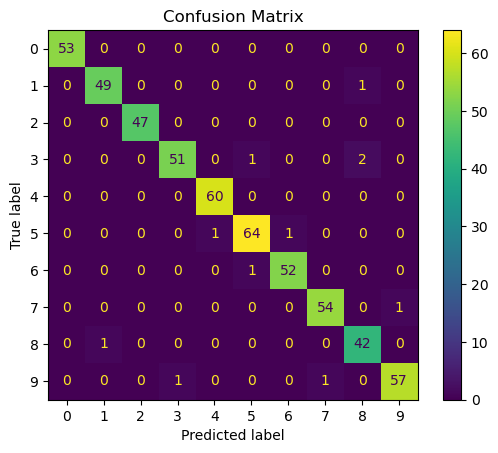

In [60]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

## Clustering on the Iris dataset

In [61]:
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt
from scipy.stats import mode
import numpy as np
import pandas as pd 

In [62]:
dataset = datasets.load_iris()

In [63]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = dataset['data']
y = dataset['target']
# print(dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\George\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(3, 4)

3 clusters in 4 dimensions

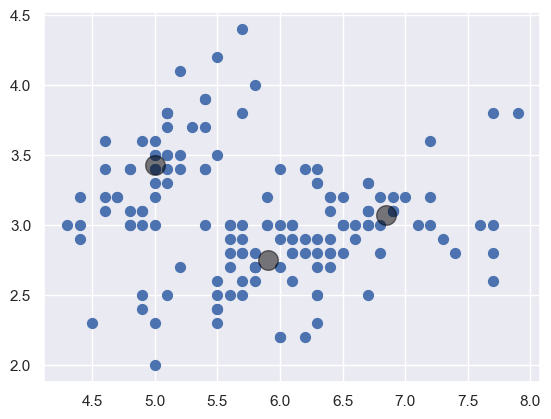

In [65]:
plt.scatter(X[:,0],X[:,1], s = 50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ='black', s=200, alpha=0.5)

In [66]:
labels = np.zeros_like(clusters)
for i in range(3): # 3 clusters
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

In [67]:
accuracy_score(y, labels)

0.8933333333333333